In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
import time

start_time = time.time()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                 epochs=10, batch_size=100, verbose=1)

print('Fit time : ',time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 6s 9ms/step - loss: 0.2232 - accuracy: 0.9356 - val_loss: 0.1034 - val_accuracy: 0.9666
Epoch 2/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0848 - accuracy: 0.9748 - val_loss: 0.0762 - val_accuracy: 0.9773
Epoch 3/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0538 - accuracy: 0.9836 - val_loss: 0.0633 - val_accuracy: 0.9791
Epoch 4/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0367 - accuracy: 0.9889 - val_loss: 0.0638 - val_accuracy: 0.9808
Epoch 5/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0265 - accuracy: 0.9919 - val_loss: 0.0689 - val_accuracy: 0.9795
Epoch 6/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0191 - accuracy: 0.9944 - val_loss: 0.0614 - val_accuracy: 0.9814
Epoch 7/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0143 - accuracy: 0.9957 - val_loss: 0.0795 - val_accuracy: 0.9776
Epoch

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

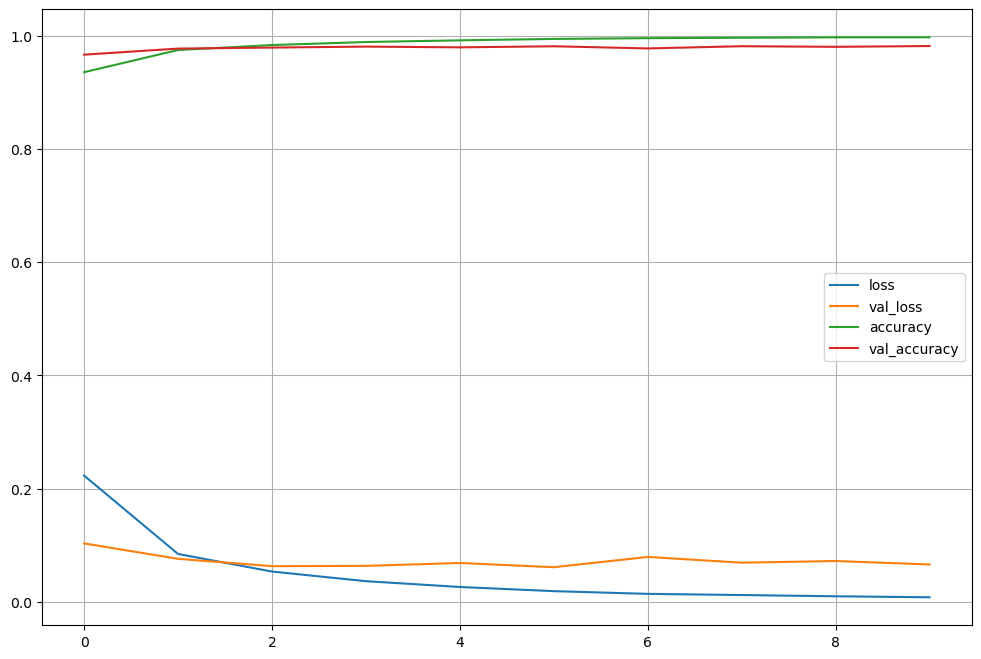

In [7]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [8]:
score = model.evaluate(X_test, y_test)
print('Test loss : ',score[0])
print('Test accuracy : ', score[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.0663 - accuracy: 0.9818
Test loss :  0.06628412753343582
Test accuracy :  0.9818000197410583


In [10]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [11]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [12]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

182

In [13]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[9679,
 7216,
 3503,
 9745,
 613,
 3117,
 4497,
 5642,
 247,
 3808,
 1247,
 8311,
 2369,
 4497,
 1112,
 2098]

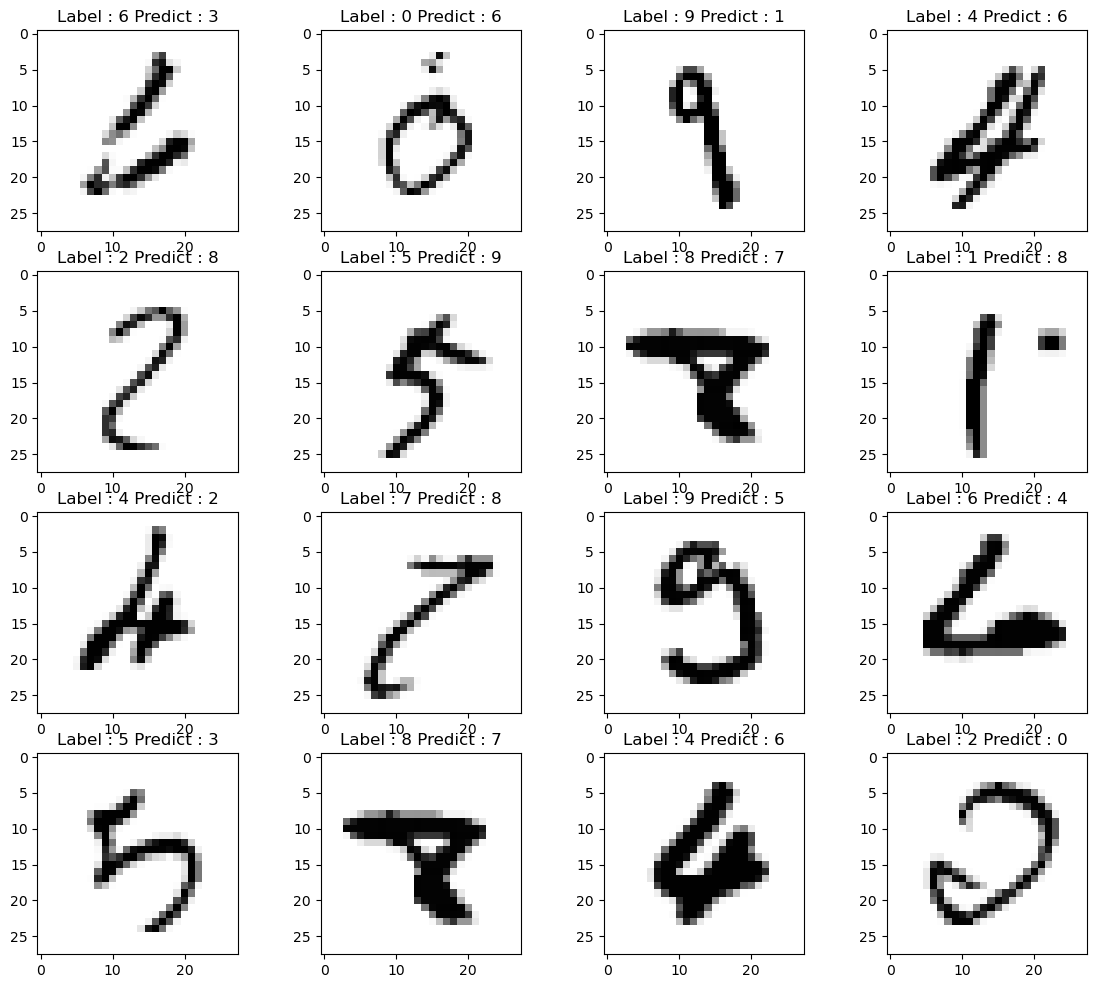

In [14]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : '+str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    
plt.show()

---

In [15]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [16]:
samples = random.choices(population=range(0, len(y_train)), k=16)

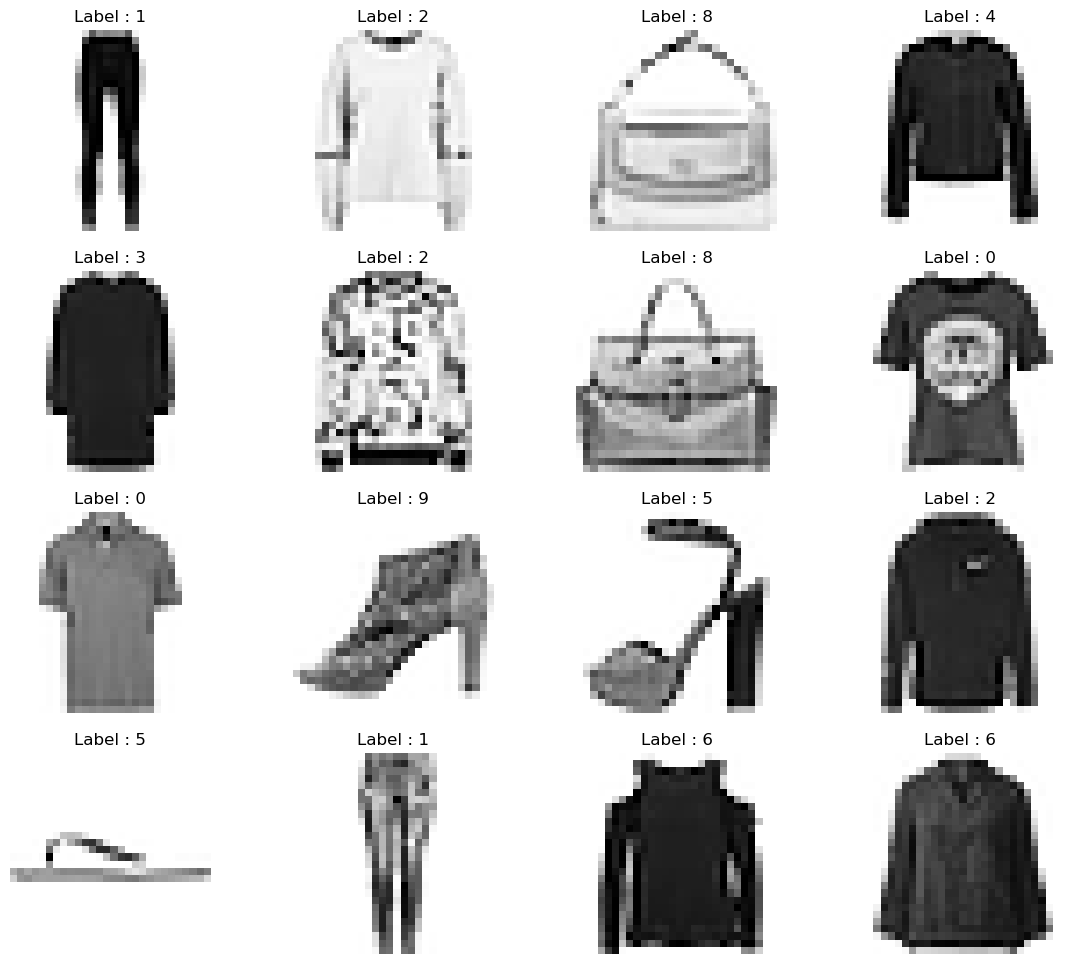

In [17]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_train[n]))
    plt.axis('off')
plt.show()

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 1000)              785000    
                                                                 
 dense_3 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
import time

start_time = time.time()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                 epochs=10, batch_size=100, verbose=1)
print('Fit time :', time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 6s 9ms/step - loss: 0.4810 - accuracy: 0.8284 - val_loss: 0.4506 - val_accuracy: 0.8378
Epoch 2/10
600/600 [==============================] - 5s 9ms/step - loss: 0.3594 - accuracy: 0.8703 - val_loss: 0.3849 - val_accuracy: 0.8577
Epoch 3/10
600/600 [==============================] - 5s 9ms/step - loss: 0.3190 - accuracy: 0.8837 - val_loss: 0.3620 - val_accuracy: 0.8701
Epoch 4/10
600/600 [==============================] - 6s 9ms/step - loss: 0.2999 - accuracy: 0.8889 - val_loss: 0.3414 - val_accuracy: 0.8782
Epoch 5/10
600/600 [==============================] - 5s 9ms/step - loss: 0.2757 - accuracy: 0.8979 - val_loss: 0.3262 - val_accuracy: 0.8831
Epoch 6/10
600/600 [==============================] - 6s 9ms/step - loss: 0.2624 - accuracy: 0.9026 - val_loss: 0.3284 - val_accuracy: 0.8824
Epoch 7/10
600/600 [==============================] - 6s 10ms/step - loss: 0.2516 - accuracy: 0.9060 - val_loss: 0.3382 - val_accuracy: 0.8797
Epoch

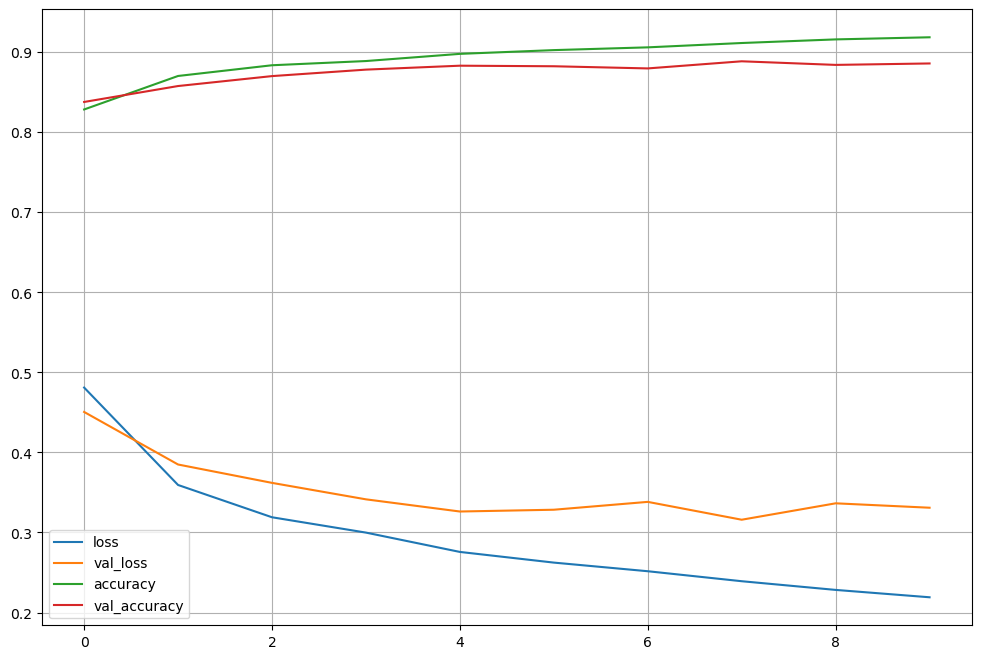

In [21]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [22]:
score = model.evaluate(X_test, y_test)
print('Test loss : ',score[0])
print('Test accuracy : ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3309 - accuracy: 0.8859
Test loss :  0.3309424817562103
Test accuracy :  0.8859000205993652


In [23]:
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 1s 3ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [24]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [25]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

1141

In [26]:
samples = random.choices(population=wrong_result, k=16)
samples

[9154,
 374,
 51,
 6654,
 153,
 7719,
 5659,
 316,
 1527,
 4299,
 9292,
 635,
 4307,
 4934,
 8745,
 8705]

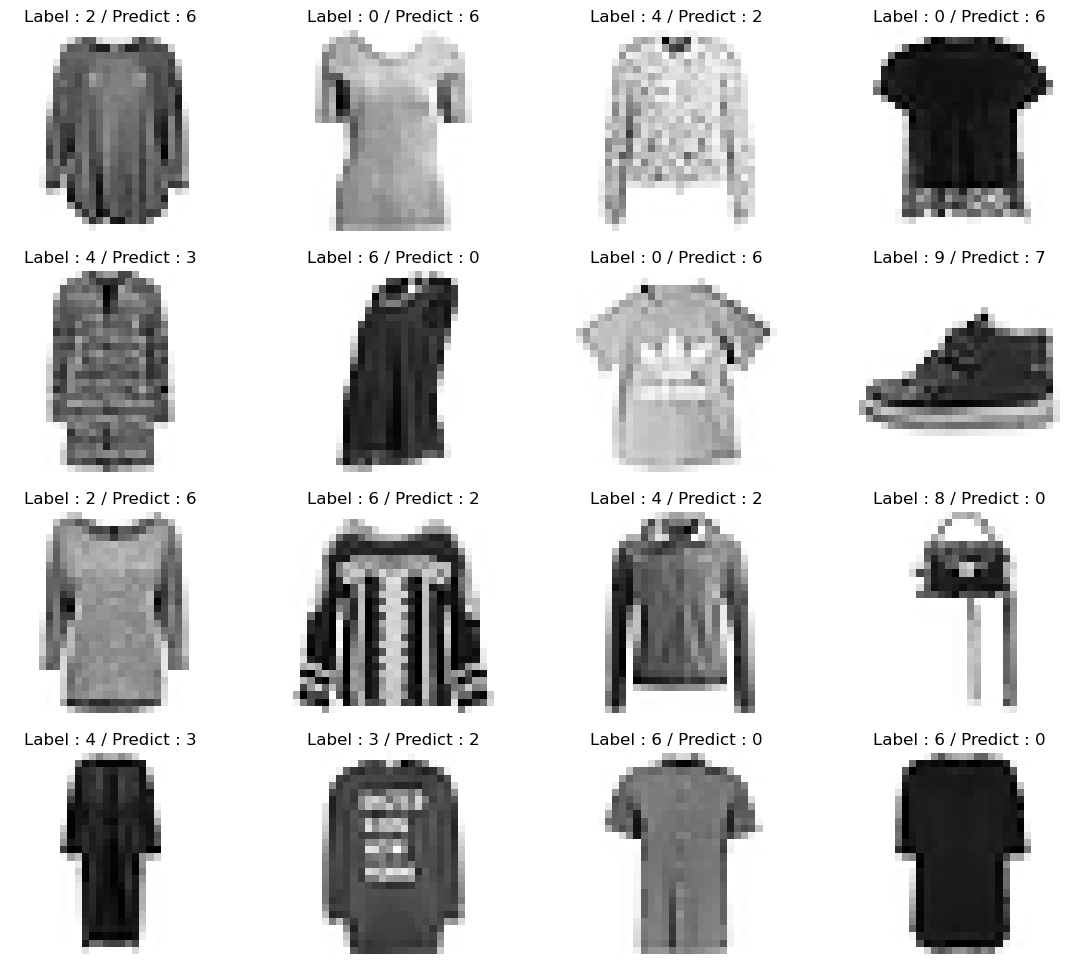

In [28]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : '+str(y_test[n]) + ' / Predict : '+str(predicted_labels[n]))
    plt.axis('off')
plt.show()